In [1]:
import star_functions as nana
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import importlib
importlib.reload(nana)
%reload_ext autoreload
%autoreload 2

/Users/nana/venv/lib/python3.13/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [2]:
intesting_kics = [6934963, 11140501]
the_delta_scutis = [5202905, 3964109, 9111849, 6116172]
aerts = [6462033, 8255796, 5941844, 3865742]
the_randoms = [7510887, 10416619, 8565304, 8423171]

nana.get_kepler_data() took 0.6237223148345947 seconds


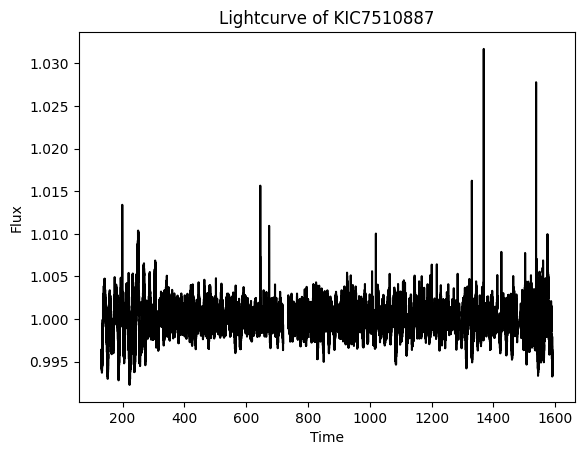

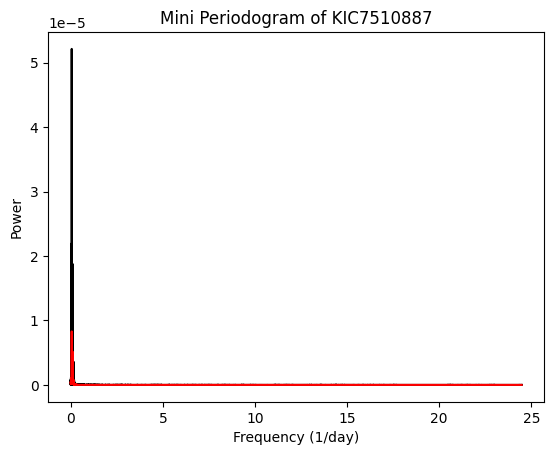

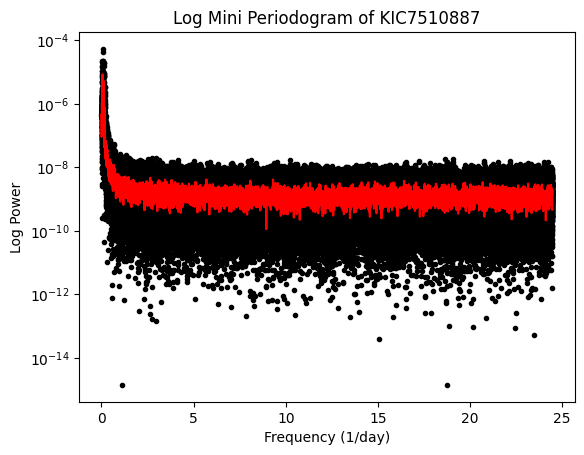

region_and_freq() took 2.813380241394043 seconds


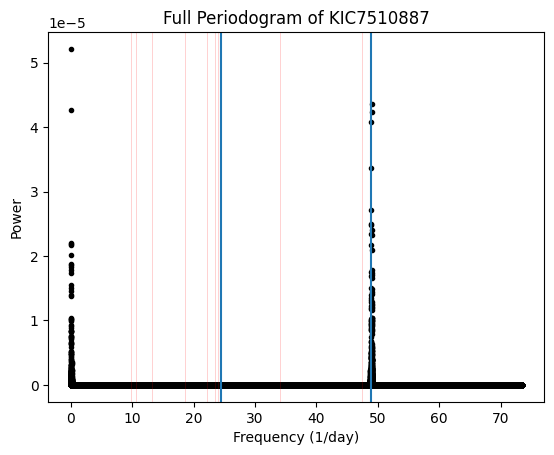

delta_chi2s for KIC7510887: [26.93153381 23.41342926 16.39012146 28.23860168 10.32519531 34.15234375
 11.91948318  6.20720673 16.28839111]
Magic numbers: f_min = 0.0006851712726000821 , over_sampling = 3 jack knife threshold = 0.1 , chi2_threshold = 100


TypeError: 'tuple' object does not support item assignment

In [10]:
for kic in the_randoms[0:1]:
    nana.find_modes_in_star(kic, True, True, median_window = 21, max_peaks = 100)

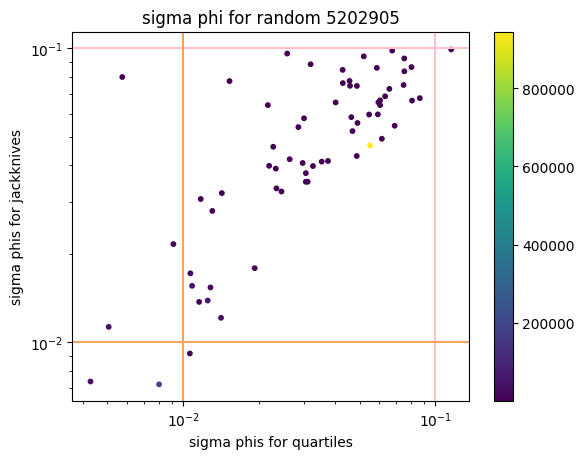

In [7]:
the_delta_scutis = [5202905]
for kic in the_delta_scutis:
    output_dir = os.path.join("sigmaphi_plots", f"random_{kic}")
    os.makedirs(output_dir, exist_ok=True)
    
    kic_csv = 'KIC' + str(kic) + '_stats.csv'
    data = pd.read_csv(kic_csv, header = 0, usecols = ['Delta chi2', 'Sigma phi(4)','Sigma phi(jack)'])
    
    delta_chi2 = data.iloc[:,0]
    phi_4 = data.iloc[:,1]
    phi_j = data.iloc[:,2]
    
    # invalid_indices = data.iloc[:,3]
    # mask_invalid = ~np.isnan(invalid_indices)
    # mask_valid = np.isnan(invalid_indices)


    
    plt.scatter(phi_4, phi_j, c = delta_chi2, marker = 'o', s = 10, label = 'delta chi >= 100', cmap = "viridis")
    plt.title(f"sigma phi for random {kic}")
    plt.xlabel("sigma phis for quartiles")
    plt.ylabel("sigma phis for jackknives")
    plt.axvline(0.1, color = 'pink')
    plt.axhline(0.1, color = 'pink')
    plt.axvline(0.01, color = 'sandybrown')
    plt.axhline(0.01, color = 'sandybrown')
    plt.loglog()
    plt.colorbar()
    plt.show()
    

    # plt.scatter(phi_4, phi_j, marker = 'o', s = 5)
    # plt.title(f"zoomed in sigma phi for delta scuti star{kic}")
    # plt.xlabel("sigma phis for quartiles")
    # plt.ylabel("sigma phis for jackknives")
    # plt.xlim(0, 0.1)
    # plt.ylim(0, 0.1)
    # plt.show()